## Even More pretrained models in PyTorch

####  https://github.com/Cadene/pretrained-models.pytorch

Can we correlate power law exponents with accuracy ?


In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import pandas as pd

import numpy as np
import powerlaw

from tqdm import tqdm_notebook as tqdm

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing Jupyter notebook from RMT_Util.ipynb


/Users/charleshmartin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.3
scipy version 1.1.0
tensforflow version 1.10.1
keras version 2.2.2
sklearn version 0.19.1
powerlaw version 1.4.3


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,5]

In [4]:
import pretrainedmodels

In [5]:
# does not work...I made symbolic link instead
# %env TORCH_MODEL_ZOO="~/work-tmp/pretrainedmodels"

### 45 Available models

In [6]:
pretrainedmodels.model_names

['fbresnet152',
 'bninception',
 'resnext101_32x4d',
 'resnext101_64x4d',
 'inceptionv4',
 'inceptionresnetv2',
 'alexnet',
 'densenet121',
 'densenet169',
 'densenet201',
 'densenet161',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'inceptionv3',
 'squeezenet1_0',
 'squeezenet1_1',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19_bn',
 'vgg19',
 'nasnetamobile',
 'nasnetalarge',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn131',
 'dpn107',
 'xception',
 'senet154',
 'se_resnet50',
 'se_resnet101',
 'se_resnet152',
 'se_resnext50_32x4d',
 'se_resnext101_32x4d',
 'cafferesnet101',
 'pnasnet5large',
 'polynet']

In [191]:
accuracies = pd.read_csv('accuracies', delimiter="\t")
len(accuracies)

62

### TODO: remove duplcates when can use our ourporting

1. get all ourporting
2. get the other pytorch models

I think this is enough

In [192]:
accuracies['platform'].unique()

array(['Tensorflow', 'ourporting', 'Caffe', 'Torch7', 'Keras', 'Pytorch'],
      dtype=object)

In [193]:
our_acc = accuracies[accuracies['platform']=='ourporting']
len(our_acc), our_acc

(24,                   model    platform    acc1    acc5
 1       PNASNet-5-Large  ourporting  82.736  95.992
 3        NASNet-A-Large  ourporting  82.566  96.086
 5              SENet154  ourporting  81.304  95.498
 7               PolyNet  ourporting  81.002  95.624
 10  SE-ResNeXt101_32x4d  ourporting  80.236  95.028
 12    InceptionResNetV2  ourporting  80.170  95.234
 13          InceptionV4  ourporting  80.062  94.926
 14    DualPathNet107_5k  ourporting  79.746  94.684
 16       DualPathNet131  ourporting  79.432  94.574
 17     DualPathNet92_5k  ourporting  79.400  94.620
 18        DualPathNet98  ourporting  79.224  94.488
 19   SE-ResNeXt50_32x4d  ourporting  79.076  94.434
 22     ResNeXt101_64x4d  ourporting  78.956  94.252
 23             Xception  ourporting  78.888  94.292
 26         SE-ResNet152  ourporting  78.658  94.374
 28         SE-ResNet101  ourporting  78.396  94.258
 30     ResNeXt101_32x4d  ourporting  78.188  93.886
 33          SE-ResNet50  ourporting  77.6

In [194]:
py_acc = accuracies[accuracies['platform']=='Pytorch']
len(py_acc), py_acc

(21,             model platform    acc1    acc5
 27      ResNet152  Pytorch  78.428  94.110
 34    DenseNet161  Pytorch  77.560  93.798
 35      ResNet101  Pytorch  77.438  93.672
 37    InceptionV3  Pytorch  77.294  93.454
 38    DenseNet201  Pytorch  77.152  93.548
 42    DenseNet169  Pytorch  76.026  92.992
 43       ResNet50  Pytorch  76.002  92.980
 45    DenseNet121  Pytorch  74.646  92.136
 46       VGG19_BN  Pytorch  74.266  92.066
 49       ResNet34  Pytorch  73.554  91.456
 51       VGG16_BN  Pytorch  73.518  91.608
 52          VGG19  Pytorch  72.080  90.822
 53          VGG16  Pytorch  71.636  90.354
 54       VGG13_BN  Pytorch  71.508  90.494
 55       VGG11_BN  Pytorch  70.452  89.818
 56       ResNet18  Pytorch  70.142  89.274
 57          VGG13  Pytorch  69.662  89.264
 58          VGG11  Pytorch  68.970  88.746
 59  SqueezeNet1_1  Pytorch  58.250  80.800
 60  SqueezeNet1_0  Pytorch  58.108  80.428
 61        Alexnet  Pytorch  56.432  79.194)

- merge dataframes
- get model names
- load pretrained
- compute alpha
- store in data frame

In [195]:
df =  pd.concat([py_acc, our_acc])
df.head()

,model,platform,acc1,acc5
27,ResNet152,Pytorch,78.428,94.110
34,DenseNet161,Pytorch,77.560,93.798
35,ResNet101,Pytorch,77.438,93.672
37,InceptionV3,Pytorch,77.294,93.454
38,DenseNet201,Pytorch,77.152,93.548


### Minimum dimension for W

In [12]:
MIN_DIM = 50

### All Linear Models

In [13]:
def count_layers(model):
    """Loops over a pytorch model and counts all the weight matrices, linear, conv2d, and conv2d-slices"""
    num_linear, num_conv2d, num_conv2d_slices = 0, 0, 0
    
    for im, m in enumerate(model.modules()):
        #print(im,m)
        if isinstance(m, nn.Linear):     
            W = np.array(m.weight.data.clone().cpu())
            if W is not None:
                #print(im,m, W.shape)
                num_linear += 1
        elif isinstance(m, nn.Conv2d):
            #print("conv2d")
            Wtensor = np.array(m.weight.data.clone().cpu())
            #print(Wtensor.shape)
            Wmats = RMT_Util.get_conv2D_Wmats(Wtensor)
            #print(im,m)
            num_conv2d += 1
            for W in Wmats:
                #print(W.shape)
                if (np.min(W.shape) >= MIN_DIM):
                    num_conv2d_slices += 1
                
    return num_linear, num_conv2d, num_conv2d_slices
        

In [14]:
def iter_pytotch_layers(model, min_dim=MIN_DIM):
    """Iterate over a pytorch layers and  weight matrix.  
    Supports linear, conv2d, and conv2d-slices"""
    for im, m in enumerate(model.modules()):
        if isinstance(m, nn.Linear):     
            W = np.array(m.weight.data.clone().cpu())
            if W is not None:
                yield W
        elif isinstance(m, nn.Conv2d):
            Wtensor = np.array(m.weight.data.clone().cpu())
            Wmats = RMT_Util.get_conv2D_Wmats(Wtensor)
            for W in Wmats:
                if (np.min(W.shape) >= min_dim):
                    yield W

In [17]:
def calc_model_alphas(model):
    try:
        alphas, min_svs, Qs = [], [], []

        for W in tqdm(iter_pytotch_layers(model)):
            M, N = np.min(W.shape), np.max(W.shape)
            Q = N/M
            Qs.append(Q)

            _, sv, _ = np.linalg.svd(W)
            min_svs.append(np.min(sv))

            evals = sv*sv
            fit = powerlaw.Fit(evals, xmax=np.max(evals), verbose=False)
            alphas.append(fit.alpha)

    except:
        print("skipping ", model_name)
        pass
    
    return alphas, min_svs, Qs

In [18]:
model_name = "vgg16"
model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
model.eval()

VGG(
  (linear0): Linear(in_features=25088, out_features=4096, bias=True)
  (relu0): ReLU(inplace)
  (dropout0): Dropout(p=0.5)
  (linear1): Linear(in_features=4096, out_features=4096, bias=True)
  (relu1): ReLU(inplace)
  (dropout1): Dropout(p=0.5)
  (last_linear): Linear(in_features=4096, out_features=1000, bias=True)
)

In [19]:
alphas, min_svs, Qs = calc_model_alphas(model)

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [20]:
alphas

[2.2964333532786694, 2.18367837003559, 2.093936912920813]

In [21]:
alphas_4model = {}
counts_4model = {}
models = [m.lower().replace('-','') for m in df['model'].values]

for model_name in models:
    if(model_name in pretrainedmodels.model_names):
        
        try:
            model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
            model.eval()
            
            alphas, min_svs, Qs = calc_model_alphas(model)
            counts_4model[model_name] = count_layers(model)
            alphas_4model[model_name] = [alphas, min_svs, Qs]

        except:
            pass

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1178: RuntimeWarning: overflow encountered in double_scalars
  return (self.alpha-1) * self.xmin**(self.alpha-1)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:825: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1174: RuntimeWarning: overflow encountered in power
  return x**-self.alpha


In [117]:
df.head()

,model,platform,acc1,acc5
27,ResNet152,Pytorch,78.428,94.110
34,DenseNet161,Pytorch,77.560,93.798
35,ResNet101,Pytorch,77.438,93.672
37,InceptionV3,Pytorch,77.294,93.454
38,DenseNet201,Pytorch,77.152,93.548


In [196]:
df['modelname'] = df['model'].apply(lambda x: x.lower().replace('-',''))
df.head(3)

,model,platform,acc1,acc5,modelname
27,ResNet152,Pytorch,78.428,94.110,resnet152
34,DenseNet161,Pytorch,77.560,93.798,densenet161
35,ResNet101,Pytorch,77.438,93.672,resnet101


In [241]:
avg_alphas = {}
avg_alphas_m1 = {}
len_alphas = {}
for model_name in models:
    avg_alphas[model_name] = 0.0
    len_alphas[model_name] = 0.0
    avg_alphas_m1[model_name] = 0.0
    
    if(model_name in alphas_4model):
        avg_alphas[model_name] = np.average(alphas_4model[model_name][0])
        avg_alphas_m1[model_name] = np.average(alphas_4model[model_name][0][:-1])

        len_alphas[model_name] = len(alphas_4model[model_name][0])

In [242]:
df['avg_alpha'] = df['modelname'].apply(lambda x: avg_alphas[x] )
df['avg_alpha_m1'] = df['modelname'].apply(lambda x: avg_alphas_m1[x] )

df['num_layers'] = df['modelname'].apply(lambda x: int(len_alphas[x]) )

In [257]:
df.sort_values('model')

,model,platform,acc1,acc5,modelname,avg_alpha,num_layers,avg_alpha_m1
61,Alexnet,Pytorch,56.432,79.194,alexnet,2.800691,55,2.796633
50,BNInception,ourporting,73.522,91.560,bninception,0.000000,0,0.000000
41,CaffeResnet101,ourporting,76.200,92.766,cafferesnet101,2.997881,368,2.995803
45,DenseNet121,Pytorch,74.646,92.136,densenet121,0.000000,0,0.000000
34,DenseNet161,Pytorch,77.560,93.798,densenet161,0.000000,0,0.000000
42,DenseNet169,Pytorch,76.026,92.992,densenet169,0.000000,0,0.000000
38,DenseNet201,Pytorch,77.152,93.548,densenet201,0.000000,0,0.000000
14,DualPathNet107_5k,ourporting,79.746,94.684,dualpathnet107_5k,0.000000,0,0.000000
16,DualPathNet131,ourporting,79.432,94.574,dualpathnet131,0.000000,0,0.000000
44,DualPathNet68,ourporting,75.868,92.774,dualpathnet68,0.000000,0,0.000000


In [244]:
df_vgg11 = df[(df['model']=='VGG11')| (df['model']=='VGG11_BN')]
df_vgg11['legend']='VGG11'

df_vgg13 = df[(df['model']=='VGG13')| (df['model']=='VGG13_BN')]
df_vgg13['legend']='VGG13'

df_vgg16 = df[(df['model']=='VGG16')| (df['model']=='VGG16_BN')]
df_vgg16['legend']='VGG16'

df_vgg19 = df[(df['model']=='VGG19')| (df['model']=='VGG19_BN')]
df_vgg19['legend']='VGG19'

df_squeezenet = df[(df['model']=='SqueezeNet1_0')| (df['model']=='SqueezeNet1_1')]
df_squeezenet['legend']='SqueezeNet'

df_resnxt = df[(df['model']=='ResNeXt101_32x4d')| (df['model']=='ResNeXt101_64x4d')]
df_resnxt['legend']='ResNeXT101'


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

In [201]:
df_vgg19

,model,platform,acc1,acc5,modelname,avg_alpha,num_layers,legend
46,VGG19_BN,Pytorch,74.266,92.066,vgg19_bn,2.351588,3,VGG19
52,VGG19,Pytorch,72.080,90.822,vgg19,2.176967,3,VGG19


ResNeXT101
VGG11
VGG13
SqueezeNet


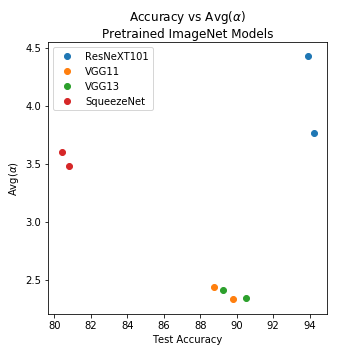

In [245]:
for mf in [df_resnxt, df_vgg11, df_vgg13, df_squeezenet]:
#for mf in [df_vgg11, df_vgg13]:
    x = mf['acc5'].values
    y = mf['avg_alpha'].values
    label = mf['legend'].values[0]
    print(label)
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Accuracy vs Avg$(\alpha)$"+"\nPretrained ImageNet Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Avg$(\alpha)$")
plt.show()

In [239]:
alphas_4model['vgg16'][0], alphas_4model['vgg16_bn'][0]

([2.2964333532786694, 2.18367837003559, 2.093936912920813],
 [2.052113042865135, 1.9682982563444593, 3.0314355152101187])

In [240]:
alphas_4model['vgg19'][0], alphas_4model['vgg19_bn'][0]

([2.2714986725464925, 2.1879226505760556, 2.071480227760304],
 [2.042001016106473, 1.9815782182748403, 3.031184861584034])

### Redo without Final Layers

ResNeXT101
VGG11
VGG13
VGG16
VGG19
SqueezeNet


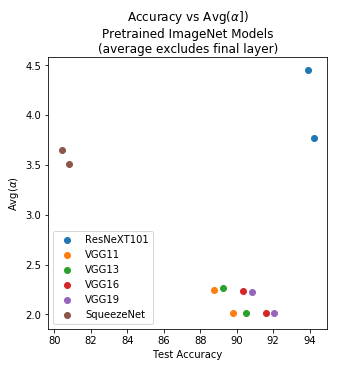

In [251]:
for mf in [df_resnxt, df_vgg11, df_vgg13, df_vgg16, df_vgg19, df_squeezenet]:
#for mf in [df_vgg11, df_vgg13]:
    x = mf['acc5'].values
    y = mf['avg_alpha_m1'].values
    label = mf['legend'].values[0]
    print(label)
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Accuracy vs Avg$(\alpha])$"+"\nPretrained ImageNet Models\n(average excludes final layer)")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Avg$(\alpha)$")
plt.show()

### No gross correlation

Have to be more clever than this

(1, 5)

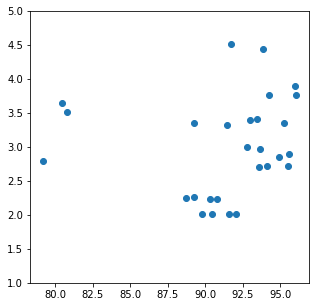

In [256]:
plt.scatter(df['acc5'].values, df['avg_alpha_m1'].values)
plt.ylim([1,5])

### ResNet

Only exception is InceptionResNetv2

resnet152
resnet101
resnet50
resnet34
resnet18


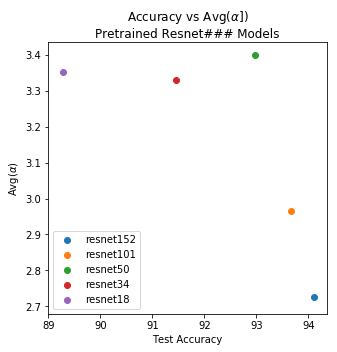

In [267]:
x, y = [], []
for name in df.modelname:
    if name.startswith('resnet'):
        print(name)
        mf = df[df.modelname==name]
        x = mf['acc5'].values
        y = mf['avg_alpha'].values
        
        plt.scatter(x,y, label=name)
        
plt.title(r"Accuracy vs Avg$(\alpha])$"+"\nPretrained Resnet### Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Avg$(\alpha)$")
plt.legend()

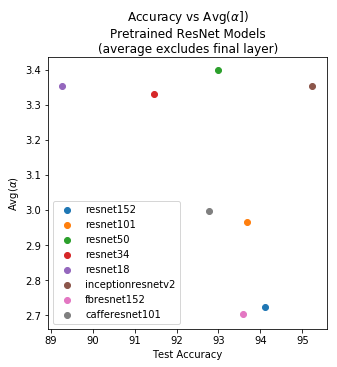

In [274]:
x, y = [], []
for name in df.modelname:
    if 'resnet' in name:
        #print(name)
        mf = df[df.modelname==name]
        x = mf['acc5'].values
        y = mf['avg_alpha_m1'].values
        if y > 0:
            plt.scatter(x,y, label=name)
        
plt.title(r"Accuracy vs Avg$(\alpha])$"+"\nPretrained ResNet Models\n(average excludes final layer)")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Avg$(\alpha)$")
plt.legend()

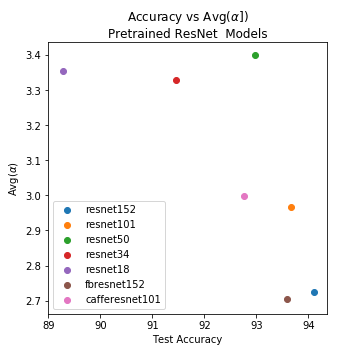

In [286]:
x, y = [], []
for name in df.modelname:
    if 'resnet' in name and 'inception' not in name:
        #print(name)
        mf = df[df.modelname==name]
        x = mf['acc5'].values
        y = mf['avg_alpha'].values
        if y > 0:
            plt.scatter(x,y, label=name)
        
plt.title(r"Accuracy vs Avg$(\alpha])$"+"\nPretrained ResNet  Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Avg$(\alpha)$")
plt.legend()

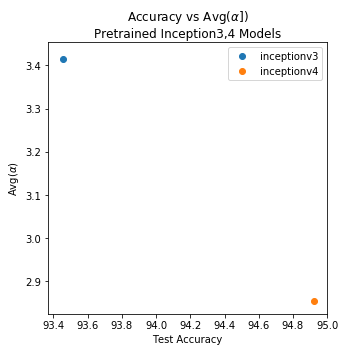

In [288]:
x, y = [], []
for name in df.modelname: 
    if 'inception' in name and 'resnet' not in name:
        #print(name)
        mf = df[df.modelname==name]
        x = mf['acc5'].values
        y = mf['avg_alpha'].values
        if y > 0:
            plt.scatter(x,y, label=name)
        
plt.title(r"Accuracy vs Avg$(\alpha])$"+"\nPretrained Inception3,4 Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Avg$(\alpha)$")
plt.legend()

In [ ]:
#for mf inacc = [df_vgg11, df_vgg13]:
    x = mf['acc5'].values
    y = mf['avg_alpha'].values
    label = mf['legend'].values[0]
    print(label)
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Accuracy vs Avg$(\alpha)$"+"\nPretrained ImageNet Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Avg$(\alpha)$")
plt.show()

### Plot for each layer .. BIG SCATTER PLOT